In [1]:
from market_data import KalshiFeatureEngineer
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Get Data

In [2]:
series_ticker = "KXOSCARPIC"  # Oscar for Best Picture ?
market_ticker = "KXOSCARPIC-26-HAM"
start_ts = "2025-09-23"
end_ts = "2026-02-15"

In [3]:
series_ticker = "KXALIENS"  # Will the U.S. confirm that aliens exist before 2027?
market_ticker = None

In [4]:
dataset_builder = KalshiFeatureEngineer(
    series_ticker=series_ticker,
    market_ticker=market_ticker,
)

In [5]:
X, y = dataset_builder.build_features()

print(f"Feature shape: {X.shape}")
print(f"Target shape: {y.shape}")

print("\nFeature columns:")
print(list(X.columns))

Feature shape: (60, 21)
Target shape: (60,)

Feature columns:
['TS', 'RET_1', 'VOLUME_1', 'RET_2', 'VOLUME_2', 'RET_3', 'VOLUME_3', 'RET_4', 'VOLUME_4', 'RET_5', 'VOLUME_5', 'RET_6', 'VOLUME_6', 'RET_7', 'VOLUME_7', 'RET_8', 'VOLUME_8', 'RET_9', 'VOLUME_9', 'RET_10', 'VOLUME_10']


In [6]:
X_train, X_val, y_train, y_val = dataset_builder.split_data(train_size=0.8)

## Train and validate a model

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [19]:
model = LogisticRegression(max_iter=2000)

In [20]:
model.fit(X_train, y_train)

print("Train acc:", model.score(X_train, y_train))
print("Val acc:", model.score(X_val, y_val))

Train acc: 0.7291666666666666
Val acc: 0.5833333333333334


In [10]:
model = RandomForestClassifier(n_estimators=500, max_depth=5)

In [17]:
model.fit(X_train, y_train)

print("Train acc:", model.score(X_train, y_train))
print("Val acc:", model.score(X_val, y_val))

Train acc: 1.0
Val acc: 0.6666666666666666


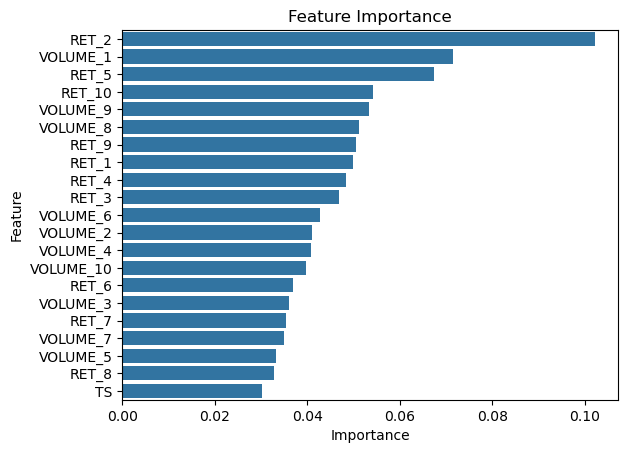

In [12]:
ax = sns.barplot(
    x=model.feature_importances_,
    y=X.columns,
    order=X.columns[model.feature_importances_.argsort()[::-1]],
)

ax.set_xlabel("Importance")
ax.set_ylabel("Feature")
ax.set_title("Feature Importance")
plt.show()